In [72]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


# League of Legends Diamond Ranked Games(10min)

[reference](https://www.kaggle.com/code/xiyuewang/lol-how-to-win)

In [73]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
%matplotlib inline
%config InlineBackEnd.figure_format='retina'

warnings.filterwarnings('ignore')
sns.set_style('darkgrid')

In [74]:
df = pd.read_csv('./high_diamond_ranked_10min.csv', encoding='utf-8-sig')

## Features

- **gameID**: 게임 판의 고유 ID
- **blueWins**: 블루팀의 승리 여부 (0: 패배, 1: 승리)
- **xxxWardsPlaced**: xxx팀의 승리 여부 (0: 패배, 1: 승리)
- **xxxWardsDestroyed**: xxx팀에서 설치한 와드의 수
- **xxxFirstBlood**: xxx팀의 첫 번째 킬 달성 여부
- **xxxKills**: xxx팀의 킬 수
- **xxxDeaths**: xxx팀의 죽음 수
- **xxxAssists**: xxx팀의 어시스트 수
- **xxxEliteMonsters**: xxx팀이 죽인 엘리트 몬스터 수
- **xxxDragons**: xxx팀이 죽인 용의 수
- **xxxHeralds**: xxx팀이 죽인 전령의 수
- **xxxTowersDestroyed**: xxx팀이 파괴한 포탑의 수
- **xxxTotalGold**: xxx팀의 전체 획득 골드
- **xxxAvgLevel**: xxx팀의 평균 레벨
- **xxxTotalExperience**: xxx팀의 총 경험치 획득량
- **xxxTotalMinionsKilled**: xxx팀의 총 미니언 킬 수
- **xxxTotalJungleMinionsKilled**: xxx팀의 총 정글 미니언 킬 수
- **xxxGoldDiff**: xxx팀과 다른 팀 간의 골드 획득량 차이
- **xxxExperienceDiff**: xxx팀과 다른 팀과의 경험치 획득량 차이
- **xxxCSPerMin**: xxx팀의 분당 CS 스코어
- **xxxGoldPerMin**: xxx팀의 분당 골드 획득량

In [75]:
df.isnull().sum()

gameId                          0
blueWins                        0
blueWardsPlaced                 0
blueWardsDestroyed              0
blueFirstBlood                  0
blueKills                       0
blueDeaths                      0
blueAssists                     0
blueEliteMonsters               0
blueDragons                     0
blueHeralds                     0
blueTowersDestroyed             0
blueTotalGold                   0
blueAvgLevel                    0
blueTotalExperience             0
blueTotalMinionsKilled          0
blueTotalJungleMinionsKilled    0
blueGoldDiff                    0
blueExperienceDiff              0
blueCSPerMin                    0
blueGoldPerMin                  0
redWardsPlaced                  0
redWardsDestroyed               0
redFirstBlood                   0
redKills                        0
redDeaths                       0
redAssists                      0
redEliteMonsters                0
redDragons                      0
redHeralds    

In [76]:
pd.set_option('display.max_columns', None)
df.head(10)

,gameId,blueWins,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,blueHeralds,blueTowersDestroyed,blueTotalGold,blueAvgLevel,blueTotalExperience,blueTotalMinionsKilled,blueTotalJungleMinionsKilled,blueGoldDiff,blueExperienceDiff,blueCSPerMin,blueGoldPerMin,redWardsPlaced,redWardsDestroyed,redFirstBlood,redKills,redDeaths,redAssists,redEliteMonsters,redDragons,redHeralds,redTowersDestroyed,redTotalGold,redAvgLevel,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled,redGoldDiff,redExperienceDiff,redCSPerMin,redGoldPerMin
0,4519157822,0,28,2,1,9,6,11,0,0,0,0,17210,6.60,17039,195,36,643,-8,19.50,1721.00,15,6,0,6,9,8,0,0,0,0,16567,6.80,17047,197,55,-643,8,19.70,1656.70
1,4523371949,0,12,1,0,5,5,5,0,0,0,0,14712,6.60,16265,174,43,-2908,-1173,17.40,1471.20,12,1,1,5,5,2,2,1,1,1,17620,6.80,17438,240,52,2908,1173,24.00,1762.00
2,4521474530,0,15,0,0,7,11,4,1,1,0,0,16113,6.40,16221,186,46,-1172,-1033,18.60,1611.30,15,3,1,11,7,14,0,0,0,0,17285,6.80,17254,203,28,1172,1033,20.30,1728.50
3,4524384067,0,43,1,0,4,5,5,1,0,1,0,15157,7.00,17954,201,55,-1321,-7,20.10,1515.70,15,2,1,5,4,10,0,0,0,0,16478,7.00,17961,235,47,1321,7,23.50,1647.80
4,4436033771,0,75,4,0,6,6,6,0,0,0,0,16400,7.00,18543,210,57,-1004,230,21.00,1640.00,17,2,1,6,6,7,1,1,0,0,17404,7.00,18313,225,67,1004,-230,22.50,1740.40
5,4475365709,1,18,0,0,5,3,6,1,1,0,0,15899,7.00,18161,225,42,698,101,22.50,1589.90,36,5,1,3,5,2,0,0,0,0,15201,7.00,18060,221,59,-698,-101,22.10,1520.10
6,4493010632,1,18,3,1,7,6,7,1,1,0,0,16874,6.80,16967,225,53,2411,1563,22.50,1687.40,57,1,0,6,7,9,0,0,0,0,14463,6.40,15404,164,35,-2411,-1563,16.40,1446.30
7,4496759358,0,16,2,0,5,13,3,0,0,0,0,15305,6.40,16138,209,48,-2615,-800,20.90,1530.50,15,0,1,13,5,11,1,1,0,0,17920,6.60,16938,157,54,2615,800,15.70,1792.00
8,4443048030,0,16,3,0,7,7,8,0,0,0,0,16401,7.20,18527,189,61,-1979,-771,18.90,1640.10,15,2,1,7,7,5,2,1,1,0,18380,7.20,19298,240,53,1979,771,24.00,1838.00
9,4509433346,1,13,1,1,4,5,5,1,1,0,0,15057,6.80,16805,220,39,-1548,-1574,22.00,1505.70,16,2,0,5,4,4,0,0,0,0,16605,6.80,18379,247,43,1548,1574,24.70,1660.50


In [77]:
pd.options.display.float_format = '{:.2f}'.format
df[[x for x in df.columns if x not in 'gameId']].describe(include='all').T

,count,mean,std,min,25%,50%,75%,max
blueWins,9879.00,0.50,0.50,0.00,0.00,0.00,1.00,1.00
blueWardsPlaced,9879.00,22.29,18.02,5.00,14.00,16.00,20.00,250.00
blueWardsDestroyed,9879.00,2.82,2.17,0.00,1.00,3.00,4.00,27.00
blueFirstBlood,9879.00,0.50,0.50,0.00,0.00,1.00,1.00,1.00
blueKills,9879.00,6.18,3.01,0.00,4.00,6.00,8.00,22.00
blueDeaths,9879.00,6.14,2.93,0.00,4.00,6.00,8.00,22.00
blueAssists,9879.00,6.65,4.06,0.00,4.00,6.00,9.00,29.00
blueEliteMonsters,9879.00,0.55,0.63,0.00,0.00,0.00,1.00,2.00
blueDragons,9879.00,0.36,0.48,0.00,0.00,0.00,1.00,1.00
blueHeralds,9879.00,0.19,0.39,0.00,0.00,0.00,0.00,1.00


### Drop Some Repeated Data

In [78]:
cols = ['gameId', #Object Feature
        'redFirstBlood', #blueFirstBlood
        'redKills', #blueDeath
        ]
df_clean = df.copy()
df_clean = df_clean.drop(cols, axis=1)

<Figure size 720x720 with 0 Axes>

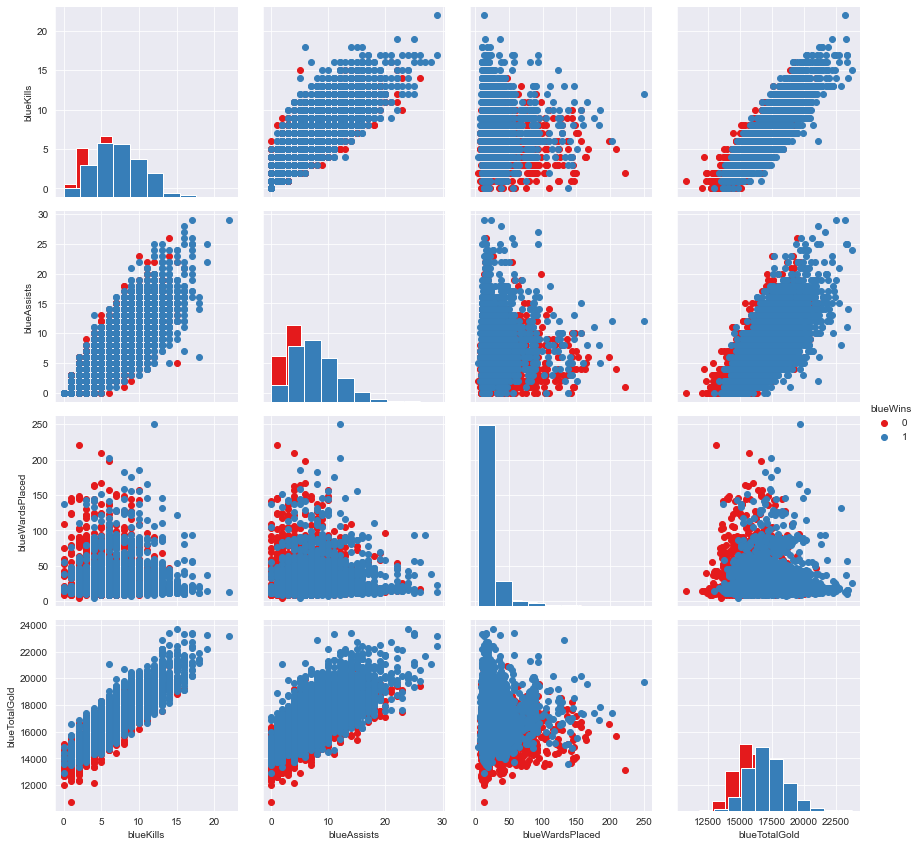

In [79]:
plt.figure(figsize=(10,10))
g1 = sns.PairGrid(data=df_clean, 
                 vars=['blueKills', 'blueAssists', 'blueWardsPlaced', 'blueTotalGold'],
                 hue='blueWins',
                 size=3,
                 palette='Set1',
                 #plot_kws=dict(alpha=0.5)
                )
g1.map_diag(plt.hist)
g1.map_offdiag(plt.scatter)
g1.add_legend()
plt.show()

<Figure size 720x720 with 0 Axes>

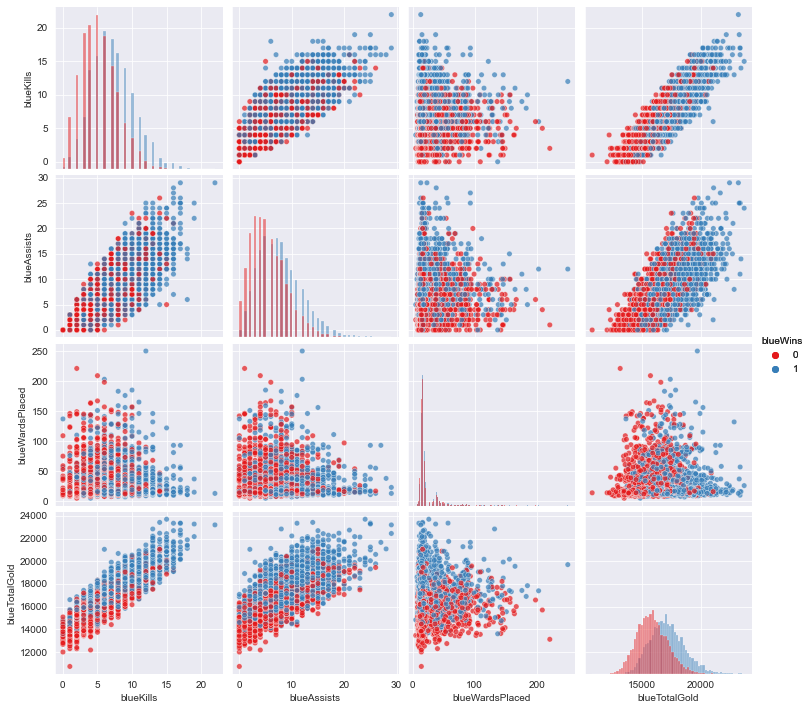

In [80]:
plt.figure(figsize=(10,10))
g2 = sns.pairplot(data=df_clean,
                  vars=['blueKills', 'blueAssists', 'blueWardsPlaced', 'blueTotalGold'],
                  hue='blueWins',
                  diag_kind='hist',
                  palette='Set1',
                  plot_kws=dict(alpha=0.7, s=30)
                 )
#g2.map_diag(plt.hist)
#g2.map_offdiag(plt.scatter)b
g2.add_legend()
plt.show()

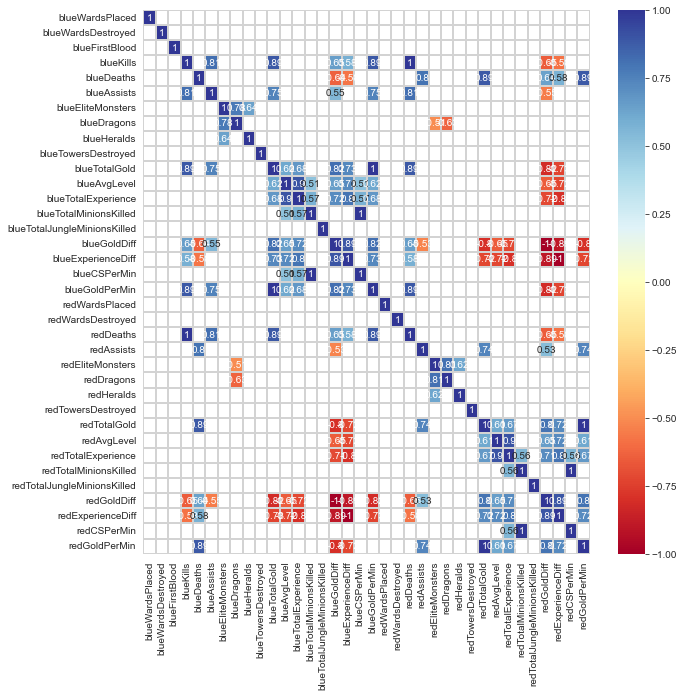

In [81]:
plt.figure(figsize=(10,10))
threshold=0.5
sns.set_style("whitegrid", {"axes.facecolor":".0"}) #background style: whitegrid, alpha:0
df_cluster = df_clean.drop(['blueWins'],axis=1).corr()
mask = df_cluster.where((abs(df_cluster)>=threshold)).isna()
sns.heatmap(df_cluster,
            cmap='RdYlBu',
            annot=True,
            mask=mask,
            linewidths=0.2,
            linecolor='lightgrey').set_facecolor('white')
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.show()

In [84]:
corr_list = df_clean[df_clean.columns[1:]].apply(lambda x: x.corr(df_clean['blueWins']))
print(corr_list)

blueWardsPlaced                 0.00
blueWardsDestroyed              0.04
blueFirstBlood                  0.20
blueKills                       0.34
blueDeaths                     -0.34
blueAssists                     0.28
blueEliteMonsters               0.22
blueDragons                     0.21
blueHeralds                     0.09
blueTowersDestroyed             0.12
blueTotalGold                   0.42
blueAvgLevel                    0.36
blueTotalExperience             0.40
blueTotalMinionsKilled          0.22
blueTotalJungleMinionsKilled    0.13
blueGoldDiff                    0.51
blueExperienceDiff              0.49
blueCSPerMin                    0.22
blueGoldPerMin                  0.42
redWardsPlaced                 -0.02
redWardsDestroyed              -0.06
redDeaths                       0.34
redAssists                     -0.27
redEliteMonsters               -0.22
redDragons                     -0.21
redHeralds                     -0.10
redTowersDestroyed             -0.10
r